##Taller cadenas de Markov


In [ ]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Punto 1: 16.3-2

In [ ]:
""" Punto a """

print("Punto a")
transmision = np.array([
    [0.995,0.005],
    [0.005,0.995]
])
print(transmision)
""" Punto b """
print("Punto b")
aux = transmision
for i in range(9):
    aux = np.dot(aux,transmision)

print(aux)

""" Punto c """
transmision = np.array([
    [0.998, 0.002],
    [0.002, 0.998]
])
print("Punto c")
aux = transmision
for i in range(9):
    aux = np.dot(aux, transmision)

print(aux)

Punto a
[[0.995 0.005]
 [0.005 0.995]]
Punto b
[[0.95219104 0.04780896]
 [0.04780896 0.95219104]]
Punto c
[[0.98035619 0.01964381]
 [0.01964381 0.98035619]]


# Punto 2: 16.5-4

In [ ]:
empresas = np.array([
    [0.70, 0.20, 0.10],
    [0.20, 0.75, 0.05],
    [0.10, 0.10, 0.80]
])

aux = []
aux.append(empresas)
count = 0

for i in range(1,100):
    
    aux.append(np.dot(aux[i-1], empresas))
    
    if np.array_equal(np.round(aux[i],6), np.round(aux[i-1],6)):
        count += 1
    
    if count == 10:
        break

# print(i)
# print(count)
# print(aux[i])

print("Estado estable")
estadoEstable = aux[-1][-1]
print(estadoEstable*100)

Estado estable
[34.61538401 38.46153768 26.92307831]


#Punto 3: 16.5-5

In [ ]:
pD0 = 0.4
pD1 = 0.3
pD2 = 0.2
pD3 = 0.1

print(" Punto a")
transicion = np.array([
    [0.6, 0.4, 0,0,0,0,0],
    [0.3, 0.3, 0.4,0,0,0,0],
    [0.1, 0.2, 0.3,0.4,0,0,0],
    [0,0.1, 0.2,0.3,0.4,0,0],
    [0,0,0.1,0.2,0.3,0.4,0],
    [0,0,0,0.1,0.2,0.3,0.4],
    [0,0,0,0,0.1,0.2,0.7],
])
print(transicion)

aux = []
aux.append(transicion)
count = 0

for i in range(1, 100):

    aux.append(np.dot(aux[i-1], transicion))

    if np.array_equal(np.round(aux[i], 6), np.round(aux[i-1], 6)):
        count += 1

    if count == 10:
        break

# print(i)
# print(count)
# print(aux[i])

print("Punto b")
estadoEstable = aux[-1][-1]
print(estadoEstable)

print("Punto c")
print(estadoEstable[-1]*pD0)

print("Punto d")
print(estadoEstable[1]*(pD2+pD3)+estadoEstable[2]*pD3)



 Punto a
[[0.6 0.4 0.  0.  0.  0.  0. ]
 [0.3 0.3 0.4 0.  0.  0.  0. ]
 [0.1 0.2 0.3 0.4 0.  0.  0. ]
 [0.  0.1 0.2 0.3 0.4 0.  0. ]
 [0.  0.  0.1 0.2 0.3 0.4 0. ]
 [0.  0.  0.  0.1 0.2 0.3 0.4]
 [0.  0.  0.  0.  0.1 0.2 0.7]]
Punto b
[0.13888301 0.13884276 0.13901684 0.1383447  0.14106435 0.13021815
 0.17363018]
Punto c
0.06945207341907066
Punto d
0.055554512593146615


# Revisar el algoritmo Hastings-Metropolis e implementar un ejemplo

In [ ]:
def metropolis(func, steps=10000):
    
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)

    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x

    return muestras

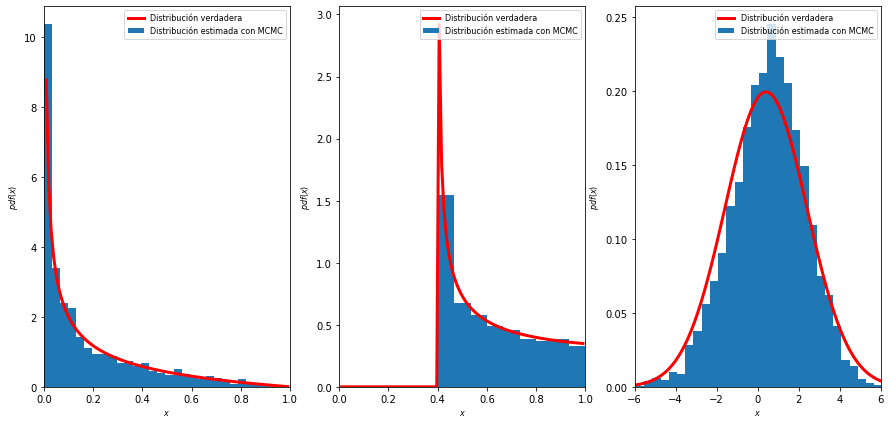

In [18]:
funciones = [stats.beta(0.4, 2), stats.arcsine(0.4, 2), stats.norm(0.4, 2)]

plt.figure(figsize=(15, 7))
for i in range(len(funciones)):
    plt.subplot(1, 3, i+1)
    func = funciones[i]
    samples = metropolis(func=func, steps=10000)
    x = np.linspace(0.01, .99, 100)
    y = func.pdf(x)
    plt.xlim(0, 1)
    if i == 2:
        x = np.linspace(-6, 10, 100)
        y = func.pdf(x)
        plt.xlim(-6, 6)
   
    plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
    plt.hist(samples, bins=30, density=True, stacked=True, label='Distribución estimada con MCMC')
    plt.xlabel('$x$', fontsize=8)
    plt.ylabel('$pdf(x)$', fontsize=8)
    plt.legend(fontsize=8)
plt.show()



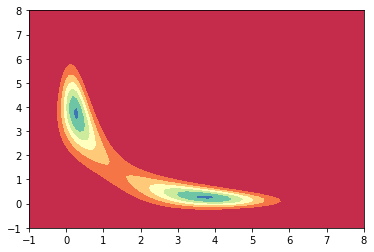

In [ ]:
def f(x, y): return np.exp(-(x*x*y*y+x*x+y*y-8*x-8*y)/2.)

xx = np.linspace(-1, 8, 100)
yy = np.linspace(-1, 8, 100)
xg, yg = np.meshgrid(xx, yy)
z = f(xg.ravel(), yg.ravel())
z2 = z.reshape(xg.shape)
plt.contourf(xg, yg, z2, cmap='Spectral')

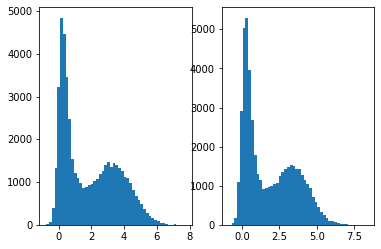

In [ ]:
N = 50000
x = np.zeros(N+1)
y = np.zeros(N+1)
x[0] = 1.
y[0] = 6.
def sig(z, i): return np.sqrt(1./(1.+z[i]*z[i]))


def mu(z, i): return 4./(1.+z[i]*z[i])


for i in range(1, N, 2):
    sig_x = sig(y, i-1)
    mu_x = mu(y, i-1)
    x[i] = np.random.normal(mu_x, sig_x)
    y[i] = y[i-1]

    sig_y = sig(x, i)
    mu_y = mu(x, i)
    y[i+1] = np.random.normal(mu_y, sig_y)
    x[i+1] = x[i]

plt.figure()
plt.subplot(1, 2, 1)
a = plt.hist(x, bins=50)
plt.subplot(1, 2, 2)
b = plt.hist(y, bins=50)

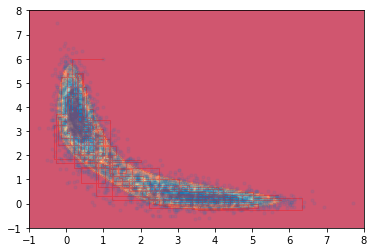

In [ ]:
plt.contourf(xg, yg, z2, alpha=0.8, cmap='Spectral')
plt.plot(x[::10],y[::10], '.', alpha=0.1)
plt.plot(x[:300],y[:300], c='r', alpha=0.3, lw=1)